In [1]:
# Sækjum gögnin
import numpy as np

leikir_fen = np.loadtxt("leikir_fen.csv", delimiter=",", dtype=list, comments=None)

In [6]:
from stockfish import Stockfish

stockfish = Stockfish(path="/home/magnus/Downloads/Installers of setup/stockfish_15.1_linux_x64/stockfish-ubuntu-20.04-x86-64")
stockfish.update_engine_parameters({"Threads": 10, "Minimum Thinking Time": 0, "Hash": 32})
stockfish.set_depth(10)

stockfish.set_fen_position(leikir_fen[0])
print(stockfish.get_evaluation())
print(stockfish.get_board_visual())
a = stockfish.get_wdl_stats()
print(a)

{'type': 'cp', 'value': 31}
+---+---+---+---+---+---+---+---+
| r | n | b | q | k | b | n | r | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P | P | P | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B | N | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h

[54, 944, 2]


In [2]:
# Finnum WDL fyrir hvern leik með Stockfish (aðeins fyrir hvítan)
from stockfish import Stockfish
import chess

stockfish = Stockfish(path="/home/magnus/Downloads/Installers of setup/stockfish_15.1_linux_x64/stockfish-ubuntu-20.04-x86-64")
stockfish.update_engine_parameters({"Threads": 10, "Minimum Thinking Time": 0, "Hash": 32})
stockfish.set_depth(10)

l=0
leikir_wdl = np.zeros((151274, 3))
for i in range(len(leikir_fen[:,0])):
#for i in range(100):
    for j in range(len(leikir_fen[0,:])):
    #for j in range(2):
        if l == 151274:
            break
        if leikir_fen[i,j] == "0":
            break
        board = chess.Board(leikir_fen[i,j])
        if board.turn:
            stockfish.set_fen_position(leikir_fen[i,j])
            leikir_wdl[l,:] = np.asarray(stockfish.get_wdl_stats())
            l += 1


KeyboardInterrupt: 

In [4]:
#leikir_wdl = leikir_wdl[0:l,:]

In [5]:
#np.savetxt("leikir_wdl.csv", leikir_wdl, delimiter=",", fmt="%d")

In [1]:
import numpy as np

leikir_wdl = np.loadtxt("leikir_wdl.csv", delimiter=",", dtype=int, comments=None)

# Breytum úr WDL í LWD til að vera eins og í tauganetinu
leikir_lwd = np.zeros(leikir_wdl.shape)
leikir_lwd[:,1] = leikir_wdl[:,0]
leikir_lwd[:,2] = leikir_wdl[:,1]
leikir_lwd[:,0] = leikir_wdl[:,2]

leikir_lwd_sigurvegari = np.argmax(leikir_lwd, axis=1)

print(leikir_wdl)
print(leikir_lwd)

[[ 50 948   2]
 [ 46 952   2]
 [ 49 950   1]
 ...
 [ 36 963   1]
 [902  98   0]
 [155 845   0]]
[[  2.  50. 948.]
 [  2.  46. 952.]
 [  1.  49. 950.]
 ...
 [  1.  36. 963.]
 [  0. 902.  98.]
 [  0. 155. 845.]]


In [2]:
# Sækjum gögnin úr SkakgreinirGogn
leikir_heild = np.loadtxt("/home/magnus/Documents/Skákgreinir_backup/leikir_heild.csv", delimiter=",", dtype=int, comments=None)
leikir_sigurvegari = np.loadtxt("leikir_sigurvegari.csv", delimiter=",", dtype=int, comments=None)

leikir_heild = leikir_heild[:300000]
leikir_sigurvegari = leikir_sigurvegari[:300000]

# Skoðum aðeins gögnin fyrir hvítann
leikir_heild_hvitur = []
leikir_sigurvegari_hvitur = []
nr_fyrri_leiks = 0
for i in range(leikir_heild.shape[0]):
    nr_nuverandi_leiks = leikir_heild[i,0]
    if nr_fyrri_leiks != nr_nuverandi_leiks:
        leikir_heild_hvitur.append(leikir_heild[i,:])
        leikir_sigurvegari_hvitur.append(leikir_sigurvegari[i])
    nr_fyrri_leiks = nr_nuverandi_leiks

leikir_heild_hvitur = np.array(leikir_heild_hvitur[:148364])
leikir_sigurvegari_hvitur = np.array(leikir_sigurvegari_hvitur[:148364])

In [4]:
from sklearn.metrics import accuracy_score

# Finnum nákvæmnina
print(accuracy_score(leikir_sigurvegari_hvitur, leikir_lwd_sigurvegari))

0.3954193739721226


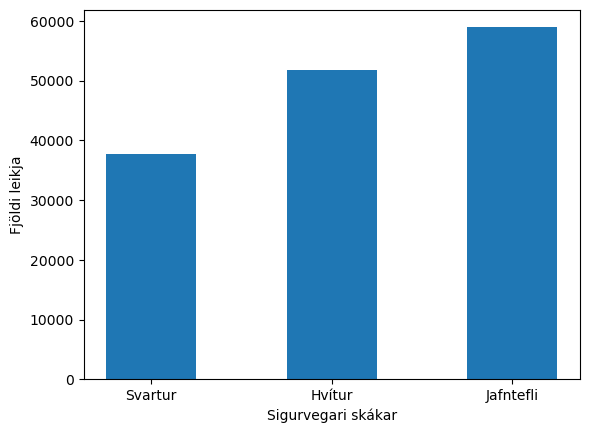

In [12]:
# Skoðum histogram fyrir leikir_lwd_sigurvegari

import matplotlib.pyplot as plt

plt.hist(leikir_lwd_sigurvegari, bins=5)
plt.xticks([0.2,1,1.8], ["Svartur", "Hvítur", "Jafntefli"])
plt.xlabel("Sigurvegari skákar")
plt.ylabel("Fjöldi leikja")
plt.show()

In [15]:
# Sækjum gögnin úr SkakgreinirGogn
import numpy as np

#leikir_heild = np.loadtxt("leikir_heild_50k.csv", delimiter=",", dtype=int, comments=None)
#leikir_sigurvegari = np.loadtxt("leikir_sigurvegari_50k.csv", delimiter=",", dtype=int, comments=None)
leikir_heild = np.loadtxt("/home/magnus/Documents/Skákgreinir_backup/leikir_heild.csv", delimiter=",", dtype=int, comments=None)
leikir_sigurvegari = np.loadtxt("leikir_sigurvegari.csv", delimiter=",", dtype=int, comments=None)

leikir_heild = leikir_heild[:300000]
leikir_sigurvegari = leikir_sigurvegari[:300000]

# Skoðum aðeins gögnin fyrir hvítann
leikir_heild_hvitur = []
leikir_sigurvegari_hvitur = []
nr_fyrri_leiks = 0
for i in range(leikir_heild.shape[0]):
    nr_nuverandi_leiks = leikir_heild[i,0]
    if nr_fyrri_leiks != nr_nuverandi_leiks:
        leikir_heild_hvitur.append(leikir_heild[i,:])
        leikir_sigurvegari_hvitur.append(leikir_sigurvegari[i])
    nr_fyrri_leiks = nr_nuverandi_leiks

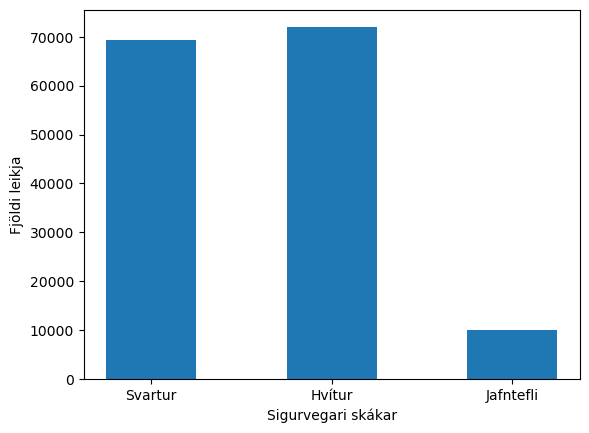

In [16]:
# Skoðum histogram fyrir leikir_siguvegari_hvitur

import matplotlib.pyplot as plt

plt.hist(leikir_sigurvegari_hvitur, bins=5)
plt.xticks([0.2,1,1.8], ["Svartur", "Hvítur", "Jafntefli"])
plt.xlabel("Sigurvegari skákar")
plt.ylabel("Fjöldi leikja")
plt.show()